In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")
import tensorflow as tf

In [3]:
df_train = pd.read_csv("kp_train.csv", sep='|')
df_test = pd.read_csv("kp_valid.csv", sep='|')
df_train.head(10)

,review,sentiment
0,Сегодня в очередной раз пересмотрел один из мо...,pos
1,На фильм попал случайно. Шел просто скоротать ...,pos
2,Накануне Дня космонавтики на российские экраны...,neu
3,Моя любимая комедия. На порядок выше голливудс...,pos
4,Астронавт Чак Бейкер прилетает на неизведанную...,pos
5,Смотрел этот фильм еще когда он шел в кинотеат...,neu
6,"Недалекое будущее, 1999 год... Довольно странн...",pos
7,В мире независимого кинематографа фильм станов...,neg
8,Перед описанием впечатлений от самого фильма о...,pos
9,"Белый, нейтральный цвет этой рецензии говорит ...",neu


In [5]:
df_train.shape

(57000, 2)

In [6]:
df_train.isna().sum()

review       0
sentiment    0
dtype: int64

In [4]:
le = LabelEncoder()
df_train["sentiment"] = le.fit_transform(df_train["sentiment"])
df_test["sentiment"] = le.fit_transform(df_test["sentiment"])
df_train.head()

,review,sentiment
0,Сегодня в очередной раз пересмотрел один из мо...,2
1,На фильм попал случайно. Шел просто скоротать ...,2
2,Накануне Дня космонавтики на российские экраны...,1
3,Моя любимая комедия. На порядок выше голливудс...,2
4,Астронавт Чак Бейкер прилетает на неизведанную...,2


In [8]:
df_train.sentiment.unique()

array([2, 1, 0])

<Axes: xlabel='sentiment', ylabel='count'>

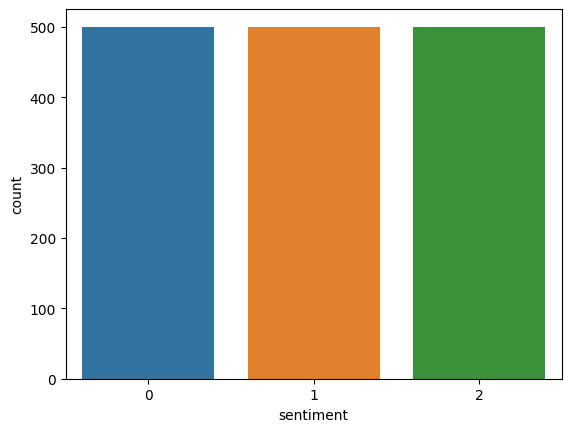

In [11]:
sns.countplot(df_train["sentiment"])
sns.countplot(df_test["sentiment"])


In [5]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^А-Яа-яA-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

In [6]:
standardize_text(df_train,"review")
standardize_text(df_test,"review")

,review,sentiment
0,странный фильм такие фильмы умеют снимать тол...,2
1,фильм великолепен! но мы привыкли придерживать...,2
2,фильм снят по мотивам бестселлера датской писа...,1
3,"шучу феноменальный сериал, он демонстрирует ...",2
4,благодаря потрясающей оригинальной музыке найм...,2
...,...,...
1495,"когда создателям фильмов не хватает таланта, э...",1
1496,"может, в воспитательном плане мультфильм в нек...",2
1497,"алекс кросс чувак, что надо в качестве дете...",1
1498,сразу скажу мультфильм совершенно дурацкий ...,2


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
lemmatizer=WordNetLemmatizer()
corpus = []
for i in range(0,len(df_train)):
    review = re.sub('[^a-zA-Z]', ' ', df_train['review'][i])
    review = review.split()
    review=[word for word in review if not word in set(stopwords.words('russian'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

In [47]:
m = pd.concat([df_train['review'], df_test['review']], axis=0, ignore_index=True)
print(m)

0        сегодня в очередной раз пересмотрел один из мо...
1        на фильм попал случайно  шел просто скоротать ...
2        накануне дня космонавтики на российские экраны...
3        моя любимая комедия  на порядок выше голливудс...
4        астронавт чак бейкер прилетает на неизведанную...
                               ...                        
58495    когда создателям фильмов не хватает таланта, э...
58496    может, в воспитательном плане мультфильм в нек...
58497    алекс кросс   чувак, что надо  в качестве дете...
58498    сразу скажу   мультфильм совершенно дурацкий  ...
58499    про страну чудес зрительская аудитория 'однажд...
Name: review, Length: 58500, dtype: object


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
tfidf.fit(pd.concat([df_train['review'], df_test['review']], axis=0, ignore_index=True))
X_train = tfidf.transform(df_train['review'])
y_train = df_train["sentiment"]

X_test = tfidf.transform(df_test['review'])
y_test = df_test["sentiment"]

In [32]:
print(y_test)

0       2
1       2
2       1
3       2
4       2
       ..
1495    1
1496    2
1497    1
1498    2
1499    1
Name: sentiment, Length: 1500, dtype: int32


In [31]:
print(X_test)

  (0, 309097)	0.042537395192509785
  (0, 111328)	0.042537395192509785
  (0, 799615)	0.042537395192509785
  (0, 111332)	0.042537395192509785
  (0, 599775)	0.042537395192509785
  (0, 347340)	0.042537395192509785
  (0, 564257)	0.042537395192509785
  (0, 755606)	0.042537395192509785
  (0, 677740)	0.042537395192509785
  (0, 430054)	0.042537395192509785
  (0, 718131)	0.042537395192509785
  (0, 338805)	0.042537395192509785
  (0, 799903)	0.042537395192509785
  (0, 391912)	0.042537395192509785
  (0, 415772)	0.042537395192509785
  (0, 448972)	0.042537395192509785
  (0, 277167)	0.042537395192509785
  (0, 128428)	0.042537395192509785
  (0, 809282)	0.042537395192509785
  (0, 254029)	0.042537395192509785
  (0, 693089)	0.042537395192509785
  (0, 799852)	0.042537395192509785
  (0, 742421)	0.042537395192509785
  (0, 391063)	0.042537395192509785
  (0, 179388)	0.042537395192509785
  :	:
  (1499, 708638)	0.034120995038479374
  (1499, 774688)	0.010145544165726529
  (1499, 243954)	0.013592098532563112
  (14

In [49]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred

In [50]:
y_pred = classifier.predict(X_test)
y_pred[:5]

array([2, 2, 2, 2, 2])

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       573
           1       0.46      0.59      0.52       388
           2       0.79      0.73      0.76       539

    accuracy                           0.68      1500
   macro avg       0.68      0.67      0.67      1500
weighted avg       0.71      0.68      0.69      1500

Accuracy Score of SVC: 68.13333333333334 %


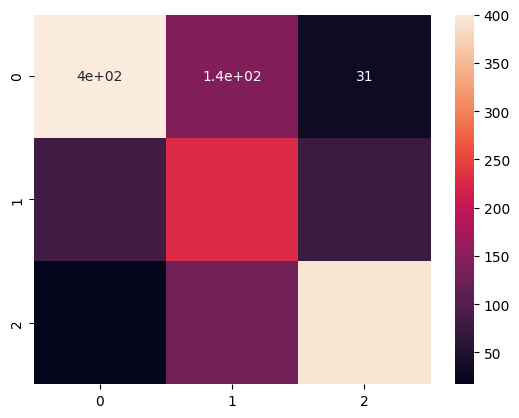

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of SVC:", acc*100,"%")

In [53]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       537
           1       0.51      0.58      0.54       446
           2       0.77      0.74      0.76       517

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.69      0.68      0.69      1500

Accuracy Score of LogisticRegression: 68.2 %


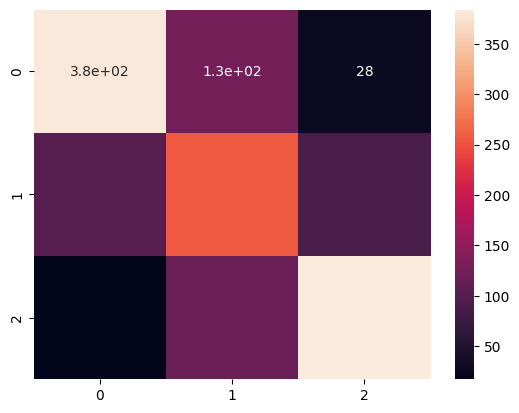

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of LogisticRegression:", acc*100,"%")

In [ ]:
from catboost import CatBoostClassifier
catBoostClassifier = CatBoostClassifier(iterations=1_000_00, custom_metric='Accuracy')
catBoostClassifier.fit(X_train,
          y_train,
          eval_set=(X_test, y_test),
          early_stopping_rounds=1_000,
          plot=True,
          verbose=0)
y_pred = catBoostClassifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of CatBoostClassifier:", acc*100,"%")

NameError: name 'y_pred' is not defined